<a href="https://colab.research.google.com/github/SowmyaLR/Statistics-for-ML/blob/pandemic-visualization/dashboard/pnademic_visualization_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%pip install pycandela

Import required packages

In [0]:
import pandas as pd
import pycandela
import matplotlib.pyplot as plt

Dataset source: [github](https://github.com/RamiKrispin/coronavirus-csv)

In [65]:
!wget -O 'coronavirus_dataset.csv' https://raw.githubusercontent.com/RamiKrispin/coronavirus-csv/master/coronavirus_dataset.csv

--2020-06-16 04:05:42--  https://raw.githubusercontent.com/RamiKrispin/coronavirus-csv/master/coronavirus_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5026733 (4.8M) [text/plain]
Saving to: ‘coronavirus_dataset.csv’

coronavirus_dataset 100%[===================>]   4.79M  13.9MB/s    in 0.3s    

2020-06-16 04:05:42 (13.9 MB/s) - ‘coronavirus_dataset.csv’ saved [5026733/5026733]



In [0]:
coronavirus_df = pd.read_csv('coronavirus_dataset.csv')

In [5]:
coronavirus_df.describe(include="all")

,Province.State,Country.Region,Lat,Long,date,cases,type
count,26106,89490,89490.000000,89490.000000,89490,89490.000000,89490
unique,81,188,NaN,NaN,114,NaN,3
top,Jilin,China,NaN,NaN,2020-05-14,NaN,confirmed
freq,342,11286,NaN,NaN,785,NaN,30324
mean,NaN,NaN,20.714023,24.353015,NaN,70.761806,NaN
std,NaN,NaN,24.758009,69.314351,NaN,784.754688,NaN
min,NaN,NaN,-51.796300,-135.000000,NaN,-10034.000000,NaN
25%,NaN,NaN,6.611100,-14.452400,NaN,0.000000,NaN
50%,NaN,NaN,22.300000,21.758700,NaN,0.000000,NaN
75%,NaN,NaN,40.143100,81.000000,NaN,1.000000,NaN


In [6]:
coronavirus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89490 entries, 0 to 89489
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province.State  26106 non-null  object 
 1   Country.Region  89490 non-null  object 
 2   Lat             89490 non-null  float64
 3   Long            89490 non-null  float64
 4   date            89490 non-null  object 
 5   cases           89490 non-null  int64  
 6   type            89490 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 4.8+ MB


In [7]:
coronavirus_df.isnull().sum()

Province.State    63384
Country.Region        0
Lat                   0
Long                  0
date                  0
cases                 0
type                  0
dtype: int64

In [0]:
geo = []

In [0]:
def process_geo_points(row):
  geo.append(dict(lat=row['Lat'], lng=row['Long']))
  return

In [0]:
coronavirus_df[['Lat', 'Long']].apply(lambda x: process_geo_points(x), axis=1)

# Confirmed cases throughout the world

In [0]:
confirmed_cases = {}

In [0]:
def process_confirmed(row):
  if row['type'] == 'confirmed':
    if row['Country.Region'] in confirmed_cases:
      confirmed_cases[row['Country.Region']] += row['cases']
    else:
      confirmed_cases[row['Country.Region']] = 0
      
    return

In [0]:
a = coronavirus_df.apply(lambda x: process_confirmed(x),axis=1)

In [0]:
top_10 = dict(sorted(confirmed_cases.items(), key=lambda x: x[1], reverse=True)[:11])

<BarContainer object of 11 artists>

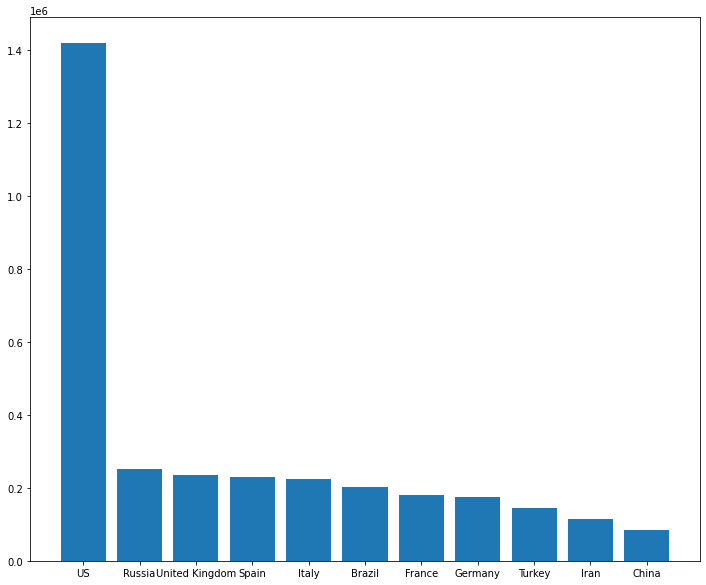

In [64]:
plt.figure(figsize=(12,10))
plt.bar(top_10.keys(),top_10.values())